### Dataset Link https://github.com/tranghth-lux/data-science-complete-tutorial/blob/master/Data/HR_comma_sep.csv.txt
- The 'left' named column represents exit from the company or not.
- build model to predict 'left' named column.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [25]:
print(df['sales'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [28]:
pd.get_dummies(df['sales'],drop_first=True).head()

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False


In [29]:
pd.get_dummies(df['salary']).head()

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [30]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
df['encoded_sales'] = en.fit_transform(df['sales'])
df['encoded_salary'] = en.fit_transform(df['salary'])

In [31]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,encoded_sales,encoded_salary
14994,0.40,0.57,2,151,3,0,1,0,support,low,8,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,8,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,8,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,8,1
14998,0.37,0.52,2,158,3,0,1,0,support,low,8,1


In [32]:
df.drop(['sales','salary'], axis=1, inplace=True)

In [33]:
df.shape

(14999, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   encoded_sales          14999 non-null  int64  
 9   encoded_salary         14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


<Axes: >

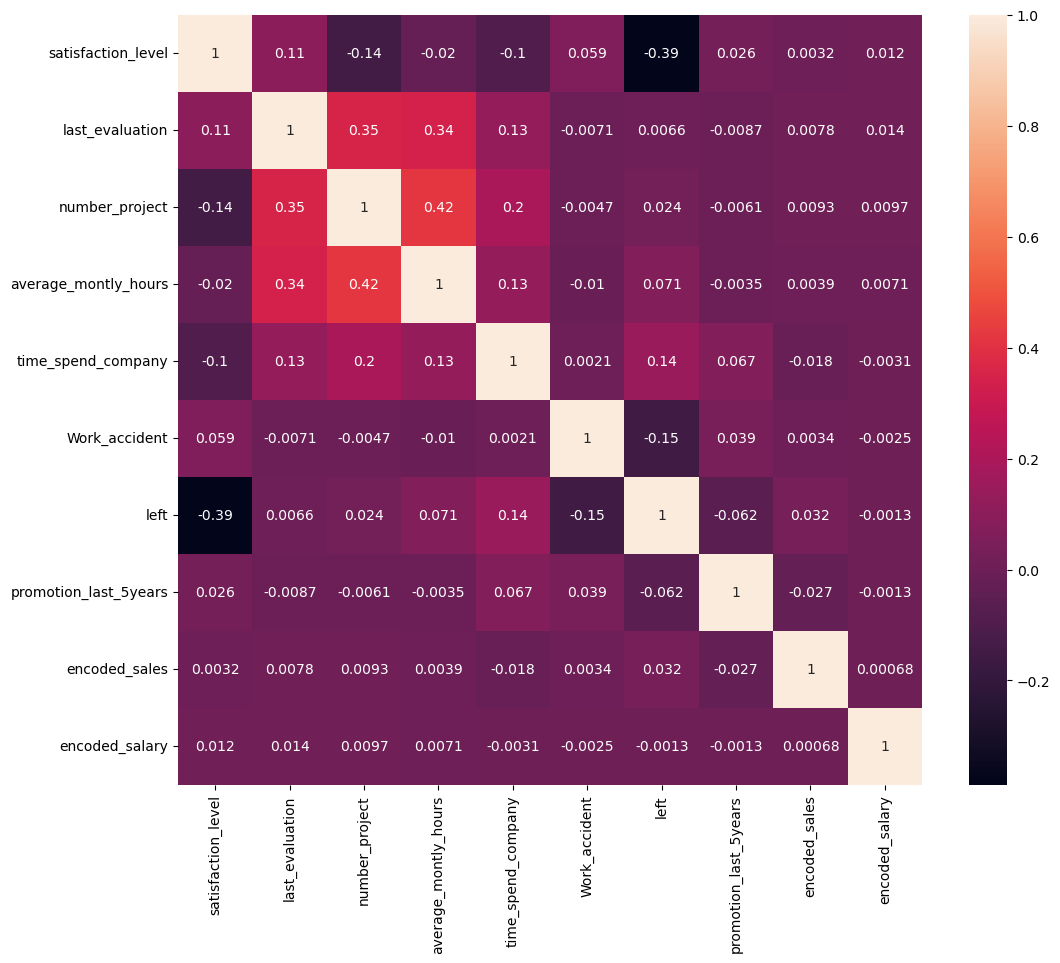

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', linecolor='blue')

<Axes: xlabel='number_project', ylabel='promotion_last_5years'>

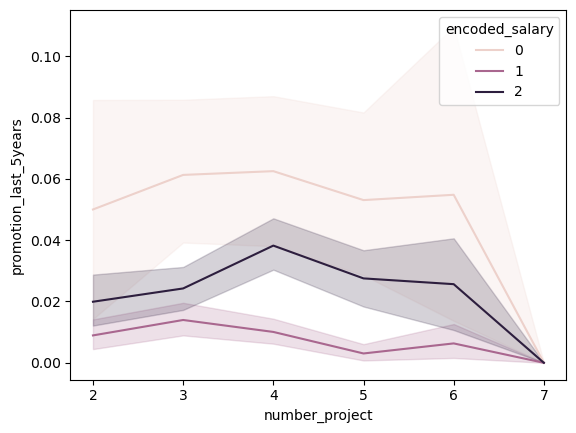

In [36]:
sns.lineplot(data=df, x='number_project', y='promotion_last_5years', hue='encoded_salary')

<Axes: xlabel='last_evaluation', ylabel='average_montly_hours'>

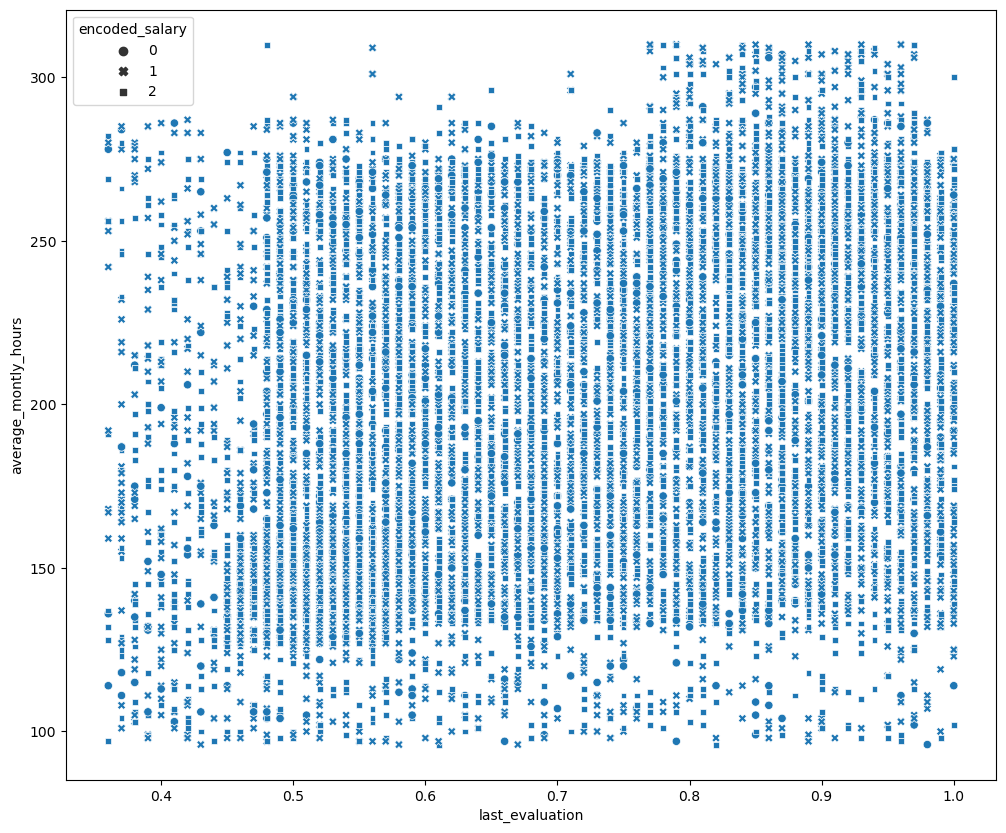

In [37]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='last_evaluation', y='average_montly_hours', style='encoded_salary' )

In [43]:
import plotly.express as px

# Count the occurrences of each category in the 'left' column
left_counts = df['left'].value_counts().reset_index()
left_counts.columns = ['left', 'count']

fig = px.pie(left_counts, values='count', names='left', title='Employee Attrition Distribution', color_discrete_sequence=['#ff9999', '#66b3ff'])
fig

In [44]:
fig = px.histogram(df, x='satisfaction_level', nbins=30, title='Distribution of  Satisfaction Level', labels={'satisfaction_level': 'Satisfaction Level'}, color_discrete_sequence=['skyblue'])
fig.update_layout(yaxis_title='Frequency')
fig.show()

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



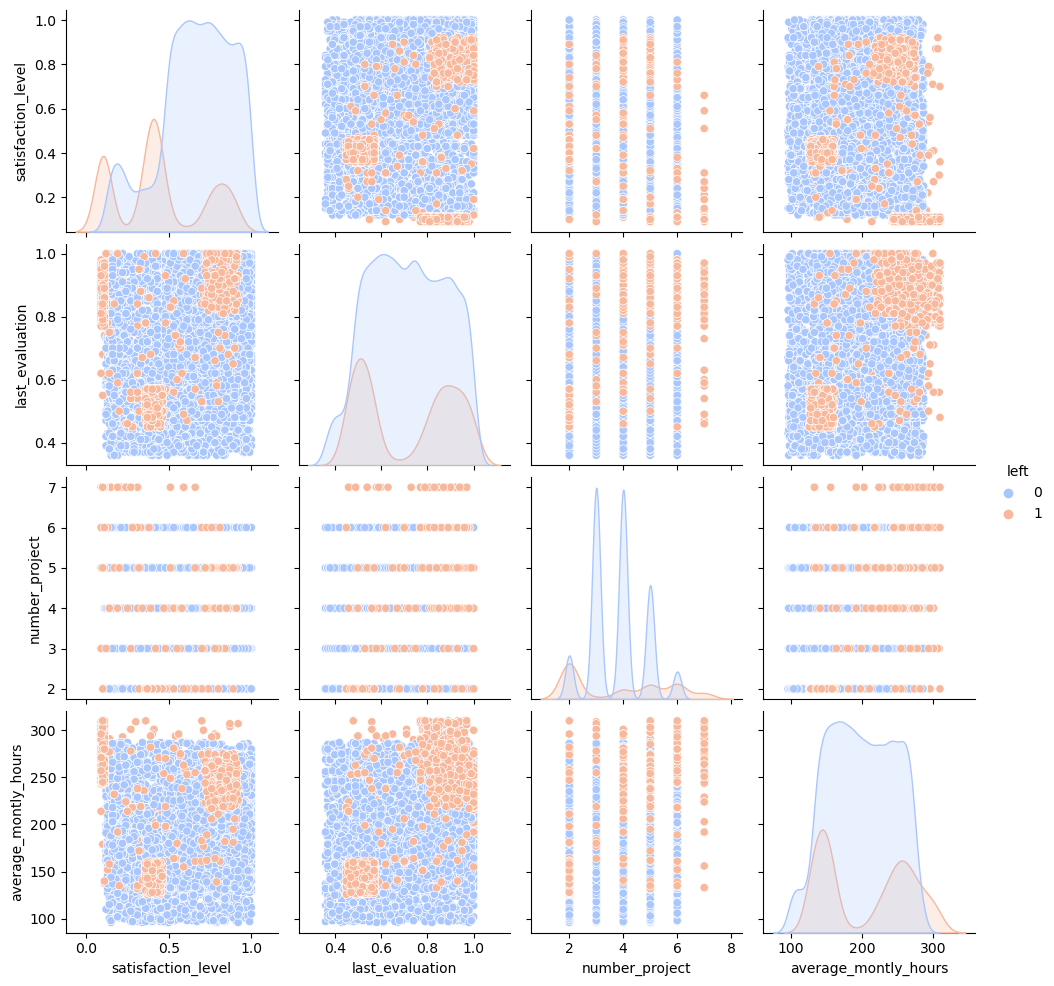

In [49]:
subset_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'left']

# Create a pairplot
sns.pairplot(df[subset_columns], hue='left', palette='coolwarm', diag_kind='kde')

# Show the plot
plt.show()

In [38]:
round(df.describe(),2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,encoded_sales,encoded_salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02,5.87,1.35
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14,2.87,0.63
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,4.00,1.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00,7.00,1.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00,8.00,2.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,9.00,2.00


In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(['left'], axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((11999, 9), (3000, 9))

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy : ",accuracy_score(y_test, y_pred))
print("Classification Report : ", classification_report(y_test, y_pred))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred))

Accuracy :  0.9923333333333333
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       0.99      0.98      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix :  [[2293    6]
 [  17  684]]


In [41]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   3.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=None, 

In [50]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_employee_attrition_model.pkl')

# Load the model
loaded_model = joblib.load('best_employee_attrition_model.pkl')

# Make predictions on new data
new_predictions = loaded_model.predict(X_test)
